In [81]:
import torch

In [83]:
layer = torch.nn.Embedding(32*64, 25)

In [86]:
a = torch.LongTensor([1,2,3])

In [88]:
layer(a).shape

torch.Size([3, 25])

In [16]:
from model.patch_model import PatchOverLapWrapper
from model.afnonet import AFNONet

In [28]:
B = 1
W = 8
H = 16
P = 2
PS= 5
x = torch.arange(B*W*H*P*PS*PS).reshape(B,W,H,P,PS,PS).float()

In [29]:
from model.patch_model import AutoPatchModel2D

In [30]:
model = AutoPatchModel2D((12,16),5)

In [31]:
y = torch.arange(12*16).reshape(1,1,12,16)

In [52]:
x = model.image_to_patches(y)
x = x.reshape(1,8,16,1,
              5,5)
x=torch.nn.functional.pad(x,(0,0,0,0,0,0,0,0,2,2))

In [53]:
x.shape

torch.Size([1, 12, 16, 1, 5, 5])

In [44]:
W= 8
H=16
L= 12

In [46]:
import numpy as np

In [51]:
x.shape

torch.Size([1, 1, 5, 5, 12, 16])

In [54]:
L =  W+4
w_idx = np.arange(0,L)
wes   = np.stack([w_idx, w_idx+1,w_idx+2, w_idx-1, w_idx-2],1)%L
yes = np.array([[2,  1,  0,  3,  4]])
x_idx = np.arange(H)
xes = np.stack([x_idx, x_idx+1,x_idx+2, x_idx-1, x_idx-2],1)%H
line  = x[:, wes, :,:,yes,:].sum(1) #(4,B, H, P, PS)
line  = line[:, :, xes,:,yes].sum(1)#(H,B,P)   

In [76]:
counting_matrix = torch.ones(L,H)
counting_matrix[0]*=5
counting_matrix[1]*=10
counting_matrix[2]*=15
counting_matrix[3]*=20
counting_matrix[4:W]*=25
counting_matrix[W]*=20
counting_matrix[W+1]*=15
counting_matrix[W+2]*=10
counting_matrix[W+3]*=5

In [77]:
print(y[0,0].numpy())

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15]
 [ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31]
 [ 32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47]
 [ 48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63]
 [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95]
 [ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127]
 [128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]
 [144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159]
 [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175]
 [176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191]]


In [78]:
print(np.array(line.permute(2,3,1,0)[0,0]/counting_matrix).astype('uint'))

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15]
 [ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31]
 [ 32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47]
 [ 48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63]
 [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95]
 [ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127]
 [128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]
 [144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159]
 [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175]
 [176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191]]


In [79]:
28*64*70

125440

In [80]:
32*64*70

143360

In [2]:
import torch
model = ViTDirect((32,64),2,70,70)

In [17]:
class Config:pass
args = Config()
args.img_size=(16,32)

In [18]:
model = AFNONet((5,5),1,2,2)
model = PatchOverLapWrapper(args,model)

In [19]:
import torch

In [ ]:
B,W,H,P = self.input_shape_tmp
# (28, 32)
x = x.reshape(B,W,H,P,self.patch_range,self.patch_range)
assert self.patch_range==5
assert not self.training

In [19]:
from vit_pytorch.vit import repeat,pair,Rearrange

In [22]:
a = torch.randn(1,2,16,32)

In [26]:
with torch.ra
model(a).shape

torch.Size([1, 2, 16, 32])

In [15]:
image_size=(32,64)
patch_size=(2,2)
channels  =70

In [27]:
torch.dist(a, model.patches_to_image(model.image_to_patches(a)))

tensor(1.0111e-06)

In [16]:
image_height, image_width = pair(image_size)
patch_height, patch_width = pair(patch_size)
num_patches = (image_height // patch_height) * (image_width // patch_width)
patch_dim   = channels * patch_height * patch_width

In [22]:
layer = Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1 = patch_height, p2 = patch_width)

In [24]:
layer(img).shape

torch.Size([1, 512, 280])

In [2]:
import numpy as np

In [1]:
from cephdataset import WeathBench7066PatchDataset

In [2]:
test_dataset = WeathBench7066PatchDataset(split='test',dataset_flag='2D70N')

use dataset in datasets/weatherbench_6hour
load data from datasets/weatherbench_6hour/test.npy


In [4]:
test_dataset.vnames.index('500hPa_geopotential')

49

In [8]:
test_dataset.vnames.index('850hPa_temperature')

38

In [5]:
fourcastresult =torch.load("checkpoints/WeathBench7066PatchDataset/PatchWrapper-AFNONet/time_step_2_pretrain-2D70N_every_1_step_random_dataset/test/fourcastresult.gpu_0")

In [25]:
img = torch.randn(1,70,32,64)
x = model.backbone.to_patch_embedding(img);print(x.shape)
b, n, _ = x.shape

cls_tokens = repeat(model.backbone.cls_token, '1 1 d -> b 1 d', b = b)
x = torch.cat((cls_tokens, x), dim=1);print(x.shape)
x += model.backbone.pos_embedding[:, :(n + 1)];print(x.shape)
x = model.backbone.dropout(x);print(x.shape)

x = model.backbone.transformer(x);print(x.shape)

x = x.mean(dim = 1) if model.backbone.pool == 'mean' else x[:, 0];print(x.shape)

x = model.backbone.to_latent(x);print(x.shape)

torch.Size([1, 512, 768])
torch.Size([1, 513, 768])
torch.Size([1, 513, 768])
torch.Size([1, 513, 768])
torch.Size([1, 513, 768])
torch.Size([1, 768])
torch.Size([1, 768])


In [4]:
model(a).shape

RuntimeError: shape '[1, -1, 32, 64]' is invalid for input of size 70

In [85]:
a = torch.randn(2,34)

In [86]:
a.median()

tensor(-0.0944)

In [6]:
property_names = test_dataset.vnames
accu_list = torch.stack([p['accu'] for p in fourcastresult.values() if 'accu' in p]).numpy()
total_num = len(accu_list)
accu_list = accu_list.mean(0)# (fourcast_num,property_num)
real_times = [(predict_time+1)*test_dataset.time_intervel*test_dataset.time_unit for predict_time in range(len(accu_list))]

In [38]:
snap_tables=[]
snap_index = fourcastresult['snap_index']
select_snap_start_time_point = snap_index[0]
select_snap_show_property_id = snap_index[1]
select_snap_property_name    = [property_names[iidd] for iidd in select_snap_show_property_id]
for select_time_point in select_snap_start_time_point:
    timestamp = test_dataset.datatimelist_pool['test'][select_time_point]
    if select_time_point in fourcastresult: # in case do not record
        linedata = fourcastresult[select_time_point]['snap_line']
        for predict_time_point, tensor, label in linedata:
            for name, value in zip(select_snap_property_name,tensor):
                predict_timestamp = 0 if predict_time_point==0 else real_times[predict_time_point-1]
                snap_tables.append([timestamp, name, predict_timestamp, value.item(), label])

In [7]:
global_rmse_map = fourcastresult['global_rmse_map']
mean_global_rmse_map = [t/total_num for t in global_rmse_map]

In [8]:
import numpy as np
import wandb,os
import json
import hashlib

In [9]:
api = wandb.Api()
run = api.run(f"szztn951357/WeathBench7066PatchDataset/runs/90618f2abf217a23937cf86ab5ae9c08")

In [20]:
wandb.init(entity='szztn951357',project='WeathBench7066PatchDataset', id="90618f2abf217a23937cf86ab5ae9c084")

In [94]:
xes

array([[0, 1, 2, 5, 2],
       [0, 1, 2, 5, 2],
       [0, 1, 2, 5, 2],
       [0, 1, 2, 5, 2],
       [0, 1, 2, 5, 2],
       [1, 2, 3, 0, 3],
       [1, 2, 3, 0, 3],
       [1, 2, 3, 0, 3],
       [1, 2, 3, 0, 3],
       [1, 2, 3, 0, 3],
       [2, 3, 4, 1, 4],
       [2, 3, 4, 1, 4],
       [2, 3, 4, 1, 4],
       [2, 3, 4, 1, 4],
       [2, 3, 4, 1, 4],
       [3, 4, 5, 2, 5],
       [3, 4, 5, 2, 5],
       [3, 4, 5, 2, 5],
       [3, 4, 5, 2, 5],
       [3, 4, 5, 2, 5],
       [4, 5, 0, 3, 0],
       [4, 5, 0, 3, 0],
       [4, 5, 0, 3, 0],
       [4, 5, 0, 3, 0],
       [4, 5, 0, 3, 0],
       [5, 0, 1, 4, 1],
       [5, 0, 1, 4, 1],
       [5, 0, 1, 4, 1],
       [5, 0, 1, 4, 1],
       [5, 0, 1, 4, 1]])

In [21]:
for j,prop_name in enumerate(property_names): 
    if prop_name in ['500hPa_geopotential','850hPa_temperature']:
        for i in range(4):
            images = wandb.Image(mean_global_rmse_map[i][...,j], caption='rmse_map')
            wandb.log({f"rmse_map_of_{prop_name}": images})

In [100]:
xes

array([[0, 1, 2, 5, 4],
       [1, 2, 3, 0, 5],
       [2, 3, 4, 1, 0],
       [3, 4, 5, 2, 1],
       [4, 5, 0, 3, 2],
       [5, 0, 1, 4, 3]])

In [26]:
import io
    
def save_plot_and_get():
    
    return PIL.Image.fromarray(img)


69

In [28]:
from mltool.visualization import *

In [108]:
fun(topvalues[xes,y])

( 2, 6,10,28,24) ( 7,11,15, 3,29) (12,16,20, 8, 4) (17,21,25,13, 9) (22,26, 0,18,14) (27, 1, 5,23,19) 


In [ ]:
import cv

In [83]:
(data>0).all()

tensor(True)

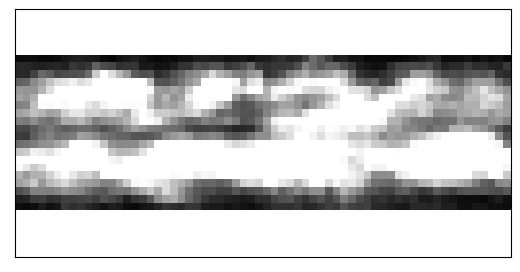

In [80]:
%matplotlib inline
fig= plt.figure()
plt.imshow(torch.nn.functional.pad(mean_global_rmse_map[2][...,69],(0,0,6,6),'constant',100),vmin=0,vmax=0.05,cmap='gray')
plt.xticks([])
plt.yticks([])
fig.savefig("debug/test.jpg")

In [64]:
Image.fromarray(data.numpy(), mode="L")

In [106]:
import numpy 

In [109]:
import pandas as pd

In [107]:
data = np.random.randn(4,70)

In [113]:
len(data.tolist())

4

In [114]:
row=[1,2,3,4]

In [203]:
x[:,0,:,0]

tensor([[[[14, 15,  0,  1,  2],
          [30, 31, 16, 17, 18],
          [46, 47, 32, 33, 34],
          [62, 63, 48, 49, 50],
          [78, 79, 64, 65, 66]],

         [[15,  0,  1,  2,  3],
          [31, 16, 17, 18, 19],
          [47, 32, 33, 34, 35],
          [63, 48, 49, 50, 51],
          [79, 64, 65, 66, 67]],

         [[ 0,  1,  2,  3,  4],
          [16, 17, 18, 19, 20],
          [32, 33, 34, 35, 36],
          [48, 49, 50, 51, 52],
          [64, 65, 66, 67, 68]],

         [[ 1,  2,  3,  4,  5],
          [17, 18, 19, 20, 21],
          [33, 34, 35, 36, 37],
          [49, 50, 51, 52, 53],
          [65, 66, 67, 68, 69]],

         [[ 2,  3,  4,  5,  6],
          [18, 19, 20, 21, 22],
          [34, 35, 36, 37, 38],
          [50, 51, 52, 53, 54],
          [66, 67, 68, 69, 70]],

         [[ 3,  4,  5,  6,  7],
          [19, 20, 21, 22, 23],
          [35, 36, 37, 38, 39],
          [51, 52, 53, 54, 55],
          [67, 68, 69, 70, 71]],

         [[ 4,  5,  6,  7,  

In [205]:
x[:, 0, xes,:, 0 ,yes][:,:,0,0][0]

tensor([0, 0, 0, 0, 0])

In [213]:
for line_id in range(W+4): #(0 --> 32)
    line = 0
    end = W + 4 
    if line_id < 4:
        for w_id in range(line_id+1):
             line += x[:, w_id, xes,:, line_id - w_id,yes].mean(1) #(H,B,P)
        line = line/(line_id + 1)
        line = line.permute(1,2,0).unsqueeze(2)#(B,P,1,H)      
    elif line_id > end - 5:
        for w_id in range(line_id - end, 0): #(-3,-2,-1)
             line += x[:, w_id, xes,:, line_id - end -1 - w_id,yes].mean(1)#(H,B,P)       
        line = line/(line_id + 1)
        line = line.permute(1,2,0).unsqueeze(2)#(B,P,1,H)       
    elif line_id == 4:
        w_idx = np.arange(2,W-2)
        wes = np.stack([w_idx, w_idx+1,w_idx+2, w_idx-1, w_idx-2],1)
        line = x[:, wes, :,:,yes,:].mean(1) #(4,B, H, P, PS)
        line = line[:, :, xes,:,yes].mean(1)#(H,B,P)   
        line = line.permute(2,3,1,0)
        
    else:
        continue
    #print(line.shape)
    lines.append(line)
lines = torch.cat(lines,2)

AttributeError: 'Tensor' object has no attribute 'append'

In [115]:
new_row = [[a]+b for a,b in zip(row,data.tolist())]

In [111]:
pd.DataFrame(data.transpose(1,0),index=range(70), columns=[1,2,3,4])

,1,2,3,4
0,0.526984,1.086613,0.280312,1.276958
1,1.080938,1.288048,-0.756077,-0.718399
2,-0.578288,1.196766,1.102878,-1.011106
3,-0.522461,2.823155,-0.121596,0.030755
4,1.417626,0.034181,-0.786947,0.058597
...,...,...,...,...
65,0.040354,0.943858,0.542913,-0.460681
66,0.934706,-0.597524,-0.114265,-1.087731
67,2.499614,-0.834295,-0.476234,-1.855398
68,-1.403065,-0.112838,-1.018460,-1.453632


# Old

In [182]:
!pip install empatches

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Preparing metadata (setup.py) ... done
  Created wheel for empatches: filename=empatches-0.2.0-py3-none-any.whl size=6269 sha256=fc58791b6737f17ec69b3a8208f6e1d00ff6a79b5171ec096dfbf7e013f3836c
  Stored in directory: /nas/zhangtianning/pip_cache_share/wheels/c2/6a/1e/91d71b757eeaa6ebc8ecb5713ab91afc000a99405b43c656a4
Successfully built empatches


In [185]:
from empatches import EMPatches

In [186]:
emp = EMPatches()

In [187]:
img_patches, indices = emp.extract_patches(img, patchsize=512, overlap=0.2)

In [146]:
line.shape

torch.Size([16, 4, 1, 2])

In [122]:
yes.shape

(1, 5)

In [40]:
print(topvalues)

array([3, 4, 0, 1, 2])

In [ ]:
for i in range(64):
    [i,]

In [42]:
patch_x_idx

array([2, 3, 4, 0, 1])

In [36]:
for i in range()

array([63,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62])

In [87]:
a = torch.randn(23,70,32,64)

In [ ]:
batch_idx  = np.array([1,2])
proper_idx = np.array([3,4]) 

In [74]:
a[0,0][2,1]

tensor(-1.2563)

In [73]:
a[0,0][[2,3,4],[1,2,3]]

tensor([-1.2563, -0.5150,  0.2888])

In [88]:
a.std(dim=(1,2,3)).shape

torch.Size([23])

In [47]:
t = torch.tensor([[1, 2], [3, 4]])
torch.gather(t, 1, torch.tensor([[0], [1]]))

tensor([[1],
        [4]])

In [49]:
pos = [0,1,2,3,4]

In [59]:
a = np.random.randn(1,2,3,4,5)

In [64]:
a[*pos]

SyntaxError: invalid syntax (709965286.py, line 1)

In [27]:
import numpy as np

In [29]:
a = np.random.randn(1500,2000)

In [33]:
a.nbytes//8//1024//1024

2

In [15]:
from model.patch_model import *

In [2]:
from model.afnonet import AFNONet

In [6]:
import torch

In [5]:
from mltool.universal_model_util import get_model_para_detail

In [21]:
class LargeMLP_3D(nn.Module):
    '''
    input is (B, P, patch_range_1,patch_range_2,patch_range_3)
    output is (B,P)
    ''' 
    def __init__(self,img_size=None,patch_range=5,in_chans=20, out_chans=20,p=0.1,**kargs):
        super().__init__()
        self.img_size = img_size
        self.patch_range = 5
        if self.patch_range == 5:
            cl = [5*5*5*in_chans,5*5*5*10,5*5*5*20,
                  5*5*5*30,5*5*5*30,5*5*5*20,
                  5*5*5*10,5*5*5*1,out_chans]
            nnlist = []
            for i in range(len(cl)-2):
                nnlist+=[nn.Linear(cl[i],cl[i+1]),nn.Dropout(p=p),nn.Tanh()]
            nnlist+=[nn.Linear(cl[-2],cl[-1])]
            self.backbone = nn.Sequential(*nnlist)
        else:
            raise NotImplementedError
        self.center_index,self.around_index=get_center_around_indexes_3D(self.patch_range,self.img_size)

    def forward(self, x):
        '''
        The input either (B,P,patch_range,patch_range) or (B,P,w,h)
        The output then is  (B,P) or (B,P,w-patch_range//2,h-patch_range//2)
        ''' 
        assert len(x.shape) == 5 #(B,P,Z,W,H)
        input_is_full_image = False
        if x.shape[-3:] == self.img_size:
            input_is_full_image = True
            x = x[..., self.around_index[:, :, : , 0],self.around_index[:, :, : , 1],self.around_index[:, :, : , 2]] 
            # (B,P,Z-2,W-2,H,Patch,Patch,Patch)
            x = x.permute(0, 2, 3, 4, 1, 5, 6, 7)
            B, Z, W, H, P, _, _, _ = x.shape
            x = x.flatten(0, 3)  # (B* Z-2 * W-2 * H, Property, Patch,Patch,Patch)
        assert tuple(x.shape[-3:]) == (self.patch_range,self.patch_range,self.patch_range)
        x = self.backbone(x.flatten(-4,-1)) # (B* W-4 * H,P)
        if input_is_full_image:
            x = x.reshape(B, Z, W, H, P).permute(0, 4, 1, 2,3) #(B, Z-2,W-2,H,P)  -> (B,P, Z-2,W-2,H)
        return x


In [22]:
model = LargeMLP_3D((14,32,64))

In [23]:
from utils.tools import getModelSize
param_sum, buffer_sum, all_size = getModelSize(model)
print(f" Number of Parameters: {param_sum}, Number of Buffers: {buffer_sum}, Size of Model: {all_size:.4f} MB\n")

 Number of Parameters: 42361395, Number of Buffers: 0, Size of Model: 161.5959 MB



In [1]:
from model.patch_model import NaiveConvModel2D

In [4]:
import torch

In [2]:
model = NaiveConvModel2D((32,64))

In [5]:
a = torch.randn(1,20,32,64)

In [9]:
from utils.tools import get_center_around_indexes

In [10]:
img_shape=(32,64)
patch_range=5
center_index,around_index=get_center_around_indexes(patch_range,img_shape)

In [13]:
around_index.shape

(28, 64, 2, 5, 5)

In [29]:
patch_range=5
delta = [list(range(-(patch_range//2),patch_range//2+1))]*2
delta = np.meshgrid(*delta)

In [30]:
delta[0].shape

(5, 5)

In [75]:
delta = [list(range(-(patch_range//2),patch_range//2+1))]*len(center)
delta = np.meshgrid(*delta)
pos  = [c+dc for c,dc in zip(center,delta)]
pos[-1]= pos[-1]%64

px = x + dx
py = y + dy
np.stack([px.flatten(),py.flatten()])

array([[2, 3, 4, 2, 3, 4, 2, 3, 4],
       [2, 2, 2, 3, 3, 3, 4, 4, 4]])

In [77]:
import torch

In [78]:
coordinate = np.arange(36).reshape(1,1,6,6)
print(coordinate)

[[[[ 0  1  2  3  4  5]
   [ 6  7  8  9 10 11]
   [12 13 14 15 16 17]
   [18 19 20 21 22 23]
   [24 25 26 27 28 29]
   [30 31 32 33 34 35]]]]


In [79]:
coordinate[:,:,pos].shape

(1, 1, 2, 3, 3, 6)

In [80]:
print(coordinate[:,:,x,y][0,0])
print(coordinate[:,:,pos[0],pos[1]][0,0])

21
[[14 20 26]
 [15 21 27]
 [16 22 28]]


In [19]:
from model.FEDformer import *

In [ ]:
nn.BatchNorm3d()

In [37]:
class moving_avg_spacetime(nn.Module):
    """
    Moving average block to highlight the trend of time series
    """
    def __init__(self, kernel_size, stride):
        super().__init__()
        assert len(kernel_size)==3
        self.kernel_size = np.array(kernel_size)
        self.avg         = nn.AvgPool3d(kernel_size=kernel_size, stride=stride, padding=0)
        self.pad_front   = self.kernel_size - 1-np.floor((self.kernel_size - 1) // 2)
        self.pad_end     = np.floor((self.kernel_size - 1) // 2)
        self.pad         = np.stack([self.pad_front,self.pad_end],1)[::-1].flatten().astype('int').tolist()
        print(self.pad)
    def forward(self, x):
        # padding on the both ends of time series
        # the input must be (B,*Space,T,C)， the -1 dim is embed channel, the -2 dim is time channel
        shape = x.shape
        BSpace_shape = shape[:-2]
        C = shape[-1]
        permute_order = [0,-1] + list(range(1,len(shape)-1))
        x = x.permute(*permute_order)#-->(B, *Space,T, C)-->(B, C, *Space,T)
        x = self.avg(F.pad(x,self.pad, mode='replicate'))
        permute_order = [0] + list(range(2,len(shape))) + [1]
        x = x.permute(*permute_order)
        return x

In [38]:
layer = moving_avg_spacetime((5,3,2),1)

[1, 0, 1, 1, 2, 2]


In [39]:
a=torch.randn(1,32,64,6,7)
layer(a).shape

torch.Size([1, 32, 64, 6, 7])

In [1]:
from model.physics_model import *

In [5]:
from model.afnonet import *

In [2]:
from utils.params import *

In [4]:
args=get_args(args=[])

In [10]:
backbone = AFNONet((32,64),2,265,20,depth=1)

In [11]:
layer = DirectSpace_Feature_Model(args,backbone)

h intervel: 32 , w intervel: 64
please notice we will using dt= 3600*1 as intertime


In [12]:
a= torch.randn(1,4,5,32,64)

In [14]:
torch.std_mean(layer(a))

(tensor(0.5915, grad_fn=<StdMeanBackward0>),
 tensor(-0.0057, grad_fn=<StdMeanBackward0>))

In [103]:
layer = Second_Derivative_Layer()

a=torch.randn(1,1,32,64)

layer(a).shape

torch.Size([1, 1, 32, 64])

In [73]:
B=2
P=4
a=torch.randn(B,P,3,32,64).cuda()
layer=  First_Derivative_Layer(dim=3).cuda()
runtime_weight=layer.runtime_weight

In [74]:
%%timeit
x = torch.conv3d(a.flatten(0,1).unsqueeze(1),runtime_weight).reshape(*a.shape[:-1],-1)

34.8 µs ± 130 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [76]:
%%timeit
x2 = torch.conv1d(a.flatten(0,-2).unsqueeze(1),runtime_weight[0,0]).reshape(*a.shape[:-1],-1)

43.1 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [20]:
torch.dist(x,x2)

tensor(0.)

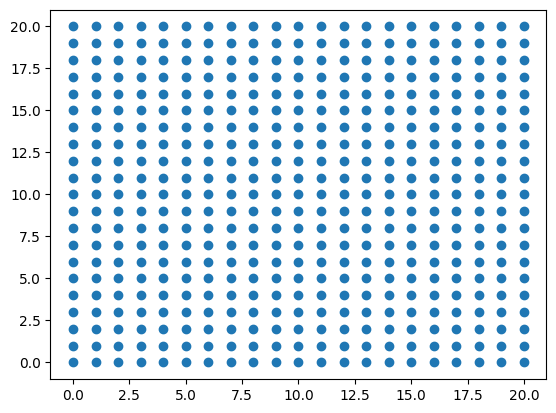

In [14]:
%matplotlib inline
plt.scatter(x,y)
#plt.scatter([10],[10],'r')

In [ ]:
def get_fourier_drive(x, position,pad):

    if len(position)==1:position = position[0]
    base_len          = np.array(x.shape[position])
    interpolate_shape = base_len + (base_len-1)*pad
    interpolate_shape = tuple(interpolate_shape)
    if isinstance(position,int) or len(position) == 1
        x = x.transpose(-1,position)
        out_shape = x.shape[:-1]
        x = x.reshape(x.size(0),-1,x.size(-1))
        b = torch.nn.functional.interpolate(x,interpolate_shape,mode='linear',align_corners=True)
        bf = torch.fft.rfft(b,dim=-1)
        kbf= bf*torch.fft.rfftfreq(b.size(-1)).reshape(1,1,-1)
        kb = torch.fft.irfft(kbf,dim=-1)
        index = torch.arange(0,b.size(-1)+1,base_len-1)
        kb = kb[...,index]

In [33]:
#from tkinter.messagebox import NO
import numpy as np
import torch,os,io,socket
from torchvision import datasets, transforms
hostname = socket.gethostname()
from functools import lru_cache
import traceback
from tqdm import tqdm
import pandas as pd
from utils.timefeatures import time_features
import os
import h5py


In [34]:
datatimelist  = np.arange(np.datetime64("1979-01-01"), np.datetime64("2016-01-01"), np.timedelta64(6, "h"))
timestamp = time_features(pd.to_datetime(datatimelist)).transpose(1, 0)


In [43]:
pd.to_datetime(np.datetime64("1980-12-31")).dayofyear

366

In [41]:
pd.to_datetime(datatimelist)[0].dayofyear

1

In [38]:
timestamp[:10,[0,-1]]

array([[-0.5       , -0.5       ],
       [-0.23913043, -0.5       ],
       [ 0.02173913, -0.5       ],
       [ 0.2826087 , -0.5       ],
       [-0.5       , -0.49726027],
       [-0.23913043, -0.49726027],
       [ 0.02173913, -0.49726027],
       [ 0.2826087 , -0.49726027],
       [-0.5       , -0.49452055],
       [-0.23913043, -0.49452055]])

In [1]:
from JCmodels.fourcastnet import *

In [2]:
model = AFNONet((32,64))

In [5]:
a = torch.randn(1,4,5,32,64)

In [6]:
model(a).shape

torch.Size([1, 4, 5, 32, 64])

#### FEDformer

#### complex version AdaptiveFourierNeuralOperator

##### validate

In [64]:
def multiply(input, weights):
    return torch.einsum('...bd,bdk->...bk', input, weights)

In [114]:
B=1
h=32;w=64;C=2
num_blocks=1
block_size=2

w1 = torch.randn(num_blocks, block_size, block_size, dtype=torch.cfloat)
b1 = torch.randn(num_blocks, block_size, dtype=torch.cfloat)
w2 = torch.randn(num_blocks, block_size, block_size, dtype=torch.cfloat)
b2 = torch.randn(num_blocks, block_size, dtype=torch.cfloat)

In [126]:
def original_realize(x,w1,b1,w2,b2):
    x = torch.fft.rfft2(x, dim=(1, 2), norm='ortho');
    x = x.reshape(B, x.shape[1], x.shape[2], num_blocks, block_size)
    x_real = F.relu(multiply(x.real, w1.real) - multiply(x.imag, w1.imag) + b1.real, inplace=True)
    x_imag = F.relu(multiply(x.real, w1.imag) + multiply(x.imag, w1.real) + b1.imag, inplace=True)
    x = torch.stack([x_real, x_imag], dim=-1)
    x = torch.view_as_complex(x)
    return x

def complex_version_realize(x,w1,b1,w2,b2):
    x = torch.fft.rfft2(x, dim=(1, 2), norm='ortho');
    x = x.reshape(B, x.shape[1], x.shape[2], num_blocks, block_size)
    x = multiply(x,w1)+b1
    x = nonlinear_activate(x)
    return x
x  = torch.randn(B, h, w, C)
y1 = original_realize(x,w1,b1,w2,b2)
y2 = complex_version_realize(x,w1,b1,w2,b2)
torch.dist(y1,y2)

tensor(0.)

In [34]:
from model.afnonet import *

##### AFNONet3D

In [212]:
class PartReLU_Complex(nn.Module):
    def forward(self,x):
        F.relu(x.real, inplace=True)
        F.relu(x.imag, inplace=True)
        return x

class AdaptiveFourierNeuralOperator(nn.Module):
    def __init__(self, dim, img_size, fno_blocks=4,fno_bias=True, fno_softshrink=False,nonlinear_activate=PartReLU_Complex()):
        super().__init__()

        self.hidden_size = dim
        self.img_size   = img_size
        self.num_blocks = fno_blocks
        self.block_size = self.hidden_size // self.num_blocks
        assert self.hidden_size % self.num_blocks == 0

        self.scale = 0.02
        self.w1 = torch.nn.Parameter(self.scale * torch.randn(self.num_blocks, self.block_size, 
                                                              self.block_size, dtype=torch.cfloat))
        self.b1 = torch.nn.Parameter(self.scale * torch.randn(self.num_blocks, self.block_size, 
                                                              dtype=torch.cfloat))
        self.w2 = torch.nn.Parameter(self.scale * torch.randn(self.num_blocks, self.block_size, 
                                                              self.block_size, dtype=torch.cfloat))
        self.b2 = torch.nn.Parameter(self.scale * torch.randn(self.num_blocks, self.block_size, 
                                                              dtype=torch.cfloat))
        self.relu = nonlinear_activate

        if fno_bias:
            self.bias = nn.Conv1d(self.hidden_size, self.hidden_size, 1)
        else:
            self.bias = None

        self.softshrink = fno_softshrink

    def multiply(self, input, weights):
        return torch.einsum('...bd,bdk->...bk', input, weights)

    def forward(self, x):
        B, N, C = x.shape    
        bias = self.bias(x.permute(0, 2, 1)).permute(0, 2, 1) if self.bias else 0
        #timer.restart(2)
        x = x.reshape(B, *self.img_size, C)
        fft_dim = tuple(range(1,len(self.img_size)+1))
        print(fft_dim)
        #timer.record('reshape1','filter',2)
        print(x.shape)
        x = torch.fft.rfftn(x, dim=fft_dim, norm='ortho');
        #timer.record('rfft2','filter',2)
        print(x.shape)
        x = x.reshape(*x.shape[:-1], self.num_blocks, self.block_size)
        #timer.record('reshape2','filter',2)
        x = self.multiply(x,self.w1)+self.b1
        x = self.relu(x)
        x = self.multiply(x,self.w2)+self.b2
        x = F.softshrink(x, lambd=self.softshrink) if self.softshrink else x
        #with torch.cuda.amp.autocast(enabled=False):
        #x = x.float()   
        #x = torch.view_as_complex(x)
        #timer.record('reset','filter',2)
        x = x.flatten(-2,-1)
        #timer.record('reshape3','filter',2)
        print(x.shape)
        x = torch.fft.irfftn(x, s=self.img_size,dim=fft_dim, norm='ortho')
        print(x.shape)
        #x = x.half()
        #timer.record('irfft2','filter',2)
        x = x.reshape(B, N, C)
        #timer.record('reshape4','filter',2)
        return x + bias

class Block(nn.Module):
    def __init__(self, dim, mlp_ratio=4., drop=0., drop_path=0., act_layer=nn.GELU,
                 norm_layer=nn.LayerNorm, region_shape=(14,8), fno_blocks=3,double_skip=False, fno_bias=False, fno_softshrink=False):
        super().__init__()
        self.norm1 = norm_layer(dim)
        self.filter = AdaptiveFourierNeuralOperator(dim, region_shape,fno_blocks=fno_blocks,fno_bias=fno_bias,fno_softshrink=fno_softshrink)
        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop)
        self.double_skip = double_skip

    def forward(self, x):
        residual = x
        #timer.restart(1)
        x = self.norm1(x)
        #timer.record('norm1','forward_features',1)
        x = self.filter(x)
        #timer.record('filter','forward_features',1)
        if self.double_skip:
            x += residual
            residual = x;
        #timer.record('residual','forward_features',1)
        x = self.norm2(x)
        #timer.record('norm2','forward_features',1)
        x = self.mlp(x)
        #timer.record('mlp','forward_features',1)
        x = self.drop_path(x)
        #timer.record('drop_path','forward_features',1)
        x += residual
        #timer.record('residual','forward_features',1)
        return x

class PatchEmbed(nn.Module):
    def __init__(self, img_size=None, patch_size=8, in_chans=13, embed_dim=768):
        super().__init__()

        if img_size is None:raise KeyError('img is None')
        patch_size   = [patch_size]*len(img_size) if isinstance(patch_size,int) else patch_size
        
        num_patches=1
        out_size=[]
        for i_size,p_size in zip(img_size,patch_size):
            if p_size%i_size:
                num_patches*=i_size// p_size
                out_size.append(i_size// p_size)
            else:
                raise NotImplementedError(f"the patch size ({patch_size}) cannot divide the img size {img_size}")
        self.img_size    = tuple(img_size)
        self.patch_size  = tuple(patch_size)
        self.num_patches = num_patches
        self.out_size    = tuple(out_size)
        conv_engine = [nn.Conv1d,nn.Conv2d,nn.Conv3d]
        self.proj   = conv_engine[len(img_size)-1](in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        B, C, = x.shape[:2]
        inp_size = x.shape[2:]
        assert tuple(inp_size) == self.img_size, f"Input image size ({inp_size}) doesn't match model set size ({self.img_size})."
        x = self.proj(x).flatten(2).transpose(1, 2)
        return x

class AFNONet(nn.Module):
    """
    
    """
    def __init__(self, img_size, patch_size=8, in_chans=20, out_chans=20, embed_dim=768, depth=12, mlp_ratio=4.,
                 uniform_drop=False, drop_rate=0., drop_path_rate=0., norm_layer=None,
                 dropcls=0, checkpoint_activations=False, fno_blocks=3,double_skip=False,
                 fno_bias=False, fno_softshrink=False,debug_mode=False):
        super().__init__()

        assert img_size is not None
        self.checkpoint_activations=checkpoint_activations
        self.embed_dim = embed_dim
        norm_layer = norm_layer or partial(nn.LayerNorm, eps=1e-6)
        self.img_size = img_size
        self.patch_embed = PatchEmbed(img_size=img_size, patch_size=patch_size, in_chans=in_chans, embed_dim=embed_dim)
        num_patches      = self.patch_embed.num_patches
        patch_size       = self.patch_embed.patch_size
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches, embed_dim))
        self.pos_drop = nn.Dropout(p=drop_rate)

        self.final_shape = self.patch_embed.out_size

        if uniform_drop:
            dpr = [drop_path_rate for _ in range(depth)]  # stochastic depth decay rule
        else:
            dpr = [x.item() for x in torch.linspace(0, drop_path_rate, depth)]  # stochastic depth decay rule

        self.blocks = nn.ModuleList([Block(dim=embed_dim, mlp_ratio=mlp_ratio, drop=drop_rate,
                                           drop_path=dpr[i], 
                                           norm_layer=norm_layer,
                                           region_shape=self.final_shape,
                                           double_skip=double_skip,
                                           fno_blocks=fno_blocks,
                                           fno_bias=fno_bias,
                                           fno_softshrink=fno_softshrink) for i in range(depth)])
        self.norm = norm_layer(embed_dim)

        # Representation layer
        # self.num_features = out_chans * img_size[0] * img_size[1]
        # self.representation_size = self.num_features * 8
        # self.pre_logits = nn.Sequential(OrderedDict([
        #     ('fc', nn.Linear(embed_dim, self.representation_size)),
        #     ('act', nn.Tanh())
        # ]))
        conf_list = [{'kernel_size':[],'stride':[],'padding':[]},
                     {'kernel_size':[],'stride':[],'padding':[]},
                     {'kernel_size':[],'stride':[],'padding':[]}]
        conv_set = {8:[[2,2,0],[2,2,0],[2,2,0]],
                    4:[[2,2,0],[3,1,1],[2,2,0]],
                    2:[[3,1,1],[3,1,1],[2,2,0]],
                    1:[[3,1,1],[3,1,1],[3,1,1]],
                   }
        for patch in patch_size:
            for slot in range(len(conf_list)):
                conf_list[slot]['kernel_size'].append(conv_set[patch][slot][0])
                conf_list[slot]['stride'].append(conv_set[patch][slot][1])
                conf_list[slot]['padding'].append(conv_set[patch][slot][2])

        transposeconv_engine = [nn.ConvTranspose1d,nn.ConvTranspose2d,nn.ConvTranspose3d][len(img_size)-1]
        self.pre_logits = nn.Sequential(OrderedDict([
            ('conv1', transposeconv_engine(embed_dim, out_chans*16, **conf_list[0])),
            ('act1', nn.Tanh()),
            ('conv2', transposeconv_engine(out_chans*16, out_chans*4, **conf_list[1])),
            ('act2', nn.Tanh())
        ]))

        # Generator head
        # self.head = nn.Linear(self.representation_size, self.num_features)
        self.head = transposeconv_engine(out_chans*4, out_chans, **conf_list[2])

        if dropcls > 0:
            print('dropout %.2f before classifier' % dropcls)
            self.final_dropout = nn.Dropout(p=dropcls)
        else:
            self.final_dropout = nn.Identity()

        trunc_normal_(self.pos_embed, std=.02)
        self.apply(self._init_weights)
        self.debug_mode=debug_mode
    
    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            trunc_normal_(m.weight, std=.02)
            if isinstance(m, nn.Linear) and m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)

    @torch.jit.ignore
    def no_weight_decay(self):
        return {'pos_embed', 'cls_token'}

    def forward_features(self, x):
        B = x.shape[0]
        x = self.patch_embed(x)
        x += self.pos_embed
        x = self.pos_drop(x)

        if not self.checkpoint_activations:
            for blk in self.blocks:
                x = blk(x)
        else:
            x = checkpoint_sequential(self.blocks, 4, x)

        x = self.norm(x).transpose(1, 2);print(x.shape)
        x = torch.reshape(x, [-1, self.embed_dim, *self.final_shape])
        return x

    def forward(self, x):
        ### we assume always feed the tensor (B, p*z, h, w)
        B, P ,h, w = x.shape
        x = x.reshape(B,-1,*self.img_size)
        #timer.restart(level=0)
        x = self.forward_features(x)
        #timer.record('forward_features',level=0)
        x = self.final_dropout(x)
        #timer.record('final_dropout',level=0)
        x = self.pre_logits(x)
        #timer.record('pre_logits',level=0)
        x = self.head(x)
        #timer.record('head',level=0)
        x = x.reshape(B,P,h,w)
        #timer.show_stat()
        #print("============================")

        return x

In [219]:
model = AFNONet(img_size=[10,32,64],patch_size=(1,8,8),depth=1)

In [220]:
a = torch.randn(1,20,10,32,64)

In [223]:
a = torch.randn(1,3,4,32,64).flatten(1,2)
torch.dist(a.reshape(1,-1,4,32,64).reshape(1,12,32,64),a)

tensor(0.)

In [225]:
a = torch.randn(1,12,32,64)
torch.dist(a.reshape(1,3,4,32,64).reshape(1,-1,32,64),a)

tensor(0.)

##### EulerEquationModel2

In [27]:
class EulerEquationModel2(nn.Module):
    def __init__(self, args, backbone):
        super().__init__()
        self.Dx= First_Derivative_Layer(position=-1, dim=3, mode=2)
        self.Dy= First_Derivative_Layer(position=-2, dim=3, mode=2)
        self.Dz= First_Derivative_Layer(position=-3, dim=3, mode=1)
        self.thermal_factor  = nn.Parameter(torch.randn(3).reshape(1,3,1,1))
        self.alpha = nn.Parameter(torch.randn(1))
        #self.p_list         = nn.Parameter(torch.Tensor([10,8.5,5]).reshape(1,3,1,1),requires_grad=False)
        self.backbone =  backbone
        self.monitor = True
    def forward(self, Field):
        # u^{t+1} &= u^{t} + F_x - \nabla (Vu)  + u \nabla\cdot V - \partial_x\phi\\
        # v^{t+1} &= v^{t} + F_y - \nabla (Vv)  + v \nabla\cdot V - \partial_y\phi\\
        # T^{t+1} &= T^{t} + Q/C_v + \frac{RT}{C_pp}\omega  - \nabla (VT) +T \nabla\cdot V\\
        # \phi^{t+1}&=\phi^{t} + wg  - \nabla (V\phi)+ \phi \nabla\cdot V \\
        # 0&\approx \nabla\cdot V
        # input -> Field  = [u ,v, T, p] --> (Batch, 4, z, y ,x)
        # need generate unknown data [Fx, Fy , Q, W, o]
        b, si_z, i_y, i_x = Field.shape
        s=4
        i_z= si_z//4
        MachineLearningPart = self.backbone(Field).reshape(b, s+1, i_z, i_y, i_x) #(Batch, 5, z, y ,x)
        ExternalForce = MachineLearningPart[:,:4] #(Batch, 4, z, y ,x)
        o = MachineLearningPart[:,4:5] #(Batch, 1, z, y ,x)
        Field = Field.reshape(b, s, i_z, i_y,  i_x) #(Batch, 5, z, y ,x)
        u = Field[:,0:1]#(Batch, 1, z, y ,x)
        v = Field[:,1:2]#(Batch, 1, z, y ,x)
        T = Field[:,2:3]#(Batch, 1, z, y ,x)
        p = Field[:,3:4]#(Batch, 1, z, y ,x)
        V = torch.cat([u,v,o],1)#(Batch, 3, z, y ,x)
        Nabla_cdot_V = (self.Dx(u[:,0]) + self.Dy(v[:,0]) + self.Dz(o[:,0])).unsqueeze(1)#(Batch, 1, z, y ,x)
        Nabla_V_Field= Nabla_cdot_V*Field #(Batch, 4, z, y ,x)
        Vphysics     = torch.stack([V*u,V*v,V*T,V*p],1)#(Batch,4, 3, z, y ,x)
        Vphysics_dx = self.Dx(Vphysics[:,:,0].flatten(0,1)).reshape(Field.shape)#(Batch, 4, z, y ,x)
        Vphysics_dy = self.Dy(Vphysics[:,:,1].flatten(0,1)).reshape(Field.shape)#(Batch, 4, z, y ,x)
        Vphysics_dz = self.Dz(Vphysics[:,:,2].flatten(0,1)).reshape(Field.shape)#(Batch, 4, z, y ,x)
        PhysicsPart = -Vphysics_dx - Vphysics_dy - Vphysics_dz + Nabla_V_Field #(Batch,4,z, y ,x)
        InteractionPart= torch.stack([self.Dx(p[:,0]),
                                      self.Dy(p[:,0]),
                                      self.thermal_factor*T[:,0]*o[:,0]],1)#(Batch,3,z, y ,x)
        InteractionPart= F.pad(InteractionPart,(0,0,0,0,0,0,0,1)) #(Batch,4,z, y ,x)
        Delta_Fd     = ExternalForce + self.alpha*(PhysicsPart + InteractionPart)
        Field        = Field+ Delta_Fd
        constrain    = Nabla_V_Field
        if not self.monitor:
            return Field.flatten(1,2),(constrain**2).mean()
        else:
            return Field.flatten(1,2),(constrain**2).mean(),{"ExternalForceFactor":(ExternalForce**2).mean().item(),
                                                             "PhysicsDrivenFactor":(PhysicsPart**2).mean().item(),
                                                             "InteractionPart":(InteractionPart**2).mean().item(),
                                                             "alpha":self.alpha.item()}
